## Optimistic Initial Values

In [1]:
# Add temporary path to code
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from k_armed_bandit.utils import plot_bandit_dist, run_bandit_stat

# For reproducibility
np.random.seed(1234)

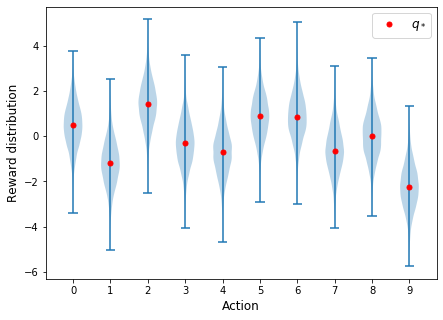

In [2]:
# Initialize bandit
k = 10
bandit = []

std = 1

for idx in range(k):
    q = np.random.normal()
    bandit.append((q, std))
    
# Plot rewards actions
plot_bandit_dist(bandit)
plt.show()

100%|██████████| 1000/1000 [04:32<00:00,  3.67it/s]


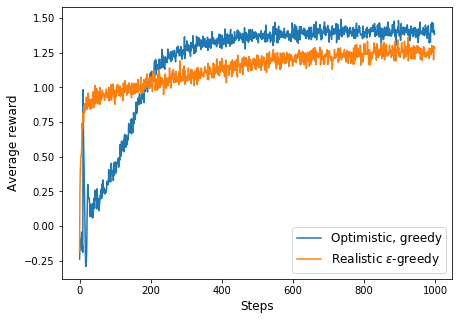

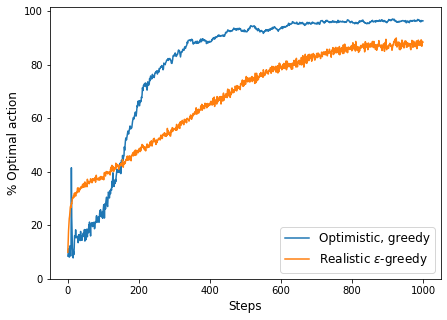

In [3]:
# Initialize variables
num_steps = 1000
num_runs = 1000

R1 = np.zeros((num_runs, num_steps))
A1 = np.zeros((num_runs, num_steps))
Q1_0 = 5 * np.ones((k, ))  # Set all Q to 5 (arbitrary initial value)

A2 = np.zeros((num_runs, num_steps))
R2 = np.zeros((num_runs, num_steps))

# Run bandits
for run in tqdm(range(num_runs)):
    Q1, R1[run, :], A1[run, :] = run_bandit_stat(bandit, num_steps, epsilon=0, 
                                                 alpha=0.1, initial_values=Q1_0)
    Q2, R2[run, :], A2[run, :] = run_bandit_stat(bandit, num_steps, epsilon=0.1, 
                                                 alpha=0.1)  # Initial values are 0

# Plot average reward
plt.figure(figsize=(7, 5))
plt.plot(np.mean(R1, axis=0))
plt.plot(np.mean(R2, axis=0))
plt.xlabel("Steps", fontsize=12)
plt.ylabel("Average reward", fontsize=12)
plt.legend([r"Optimistic, greedy", r"Realistic $\epsilon$-greedy"], fontsize=12)
plt.show()

# Plot % optimal action
plt.figure(figsize=(7, 5))
plt.plot(np.mean(A1, axis=0))
plt.plot(np.mean(A2, axis=0))
plt.xlabel("Steps", fontsize=12)
plt.ylabel("% Optimal action", fontsize=12)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ["0", "20", "40", "60", "80", "100"])
plt.legend([r"Optimistic, greedy", r"Realistic $\epsilon$-greedy"], fontsize=12)
plt.show()

## References
[Reinforcement Learning: Multi-armed Bandits (Chapter 2)](http://incompleteideas.net/book/the-book.html)